In [81]:
#Observation 1: On March 24 Fox was the most disliked news outlet..this is probably due to its political views
#Observation 2: According to the graph the majority of tweets gravitated towards a "0" polarity.  
#This could be due to accounts posting news articles
#Observation 3: All news outlets outside of fox are in a 'positive polarity light'

In [82]:
#import Dependancies
import tweepy
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd

In [83]:
#Twitter API Keys
from config import consumer_key
from config import sconsumer_key
from config import access_token
from config import saccess_token

In [84]:
#Twitter API Authorization
auth = tweepy.OAuthHandler(consumer_key, sconsumer_key)
auth.set_access_token(access_token, saccess_token)
api = tweepy.API(auth, parser = tweepy.parsers.JSONParser())

In [85]:
#Storring twitter handles
target_user = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")
sentiment = []

In [86]:
#Loop through users and gather tweet times
for user in target_user:
    compound_list=[]
    positive_list=[]
    negative_list=[]
    neutral_list=[]
    tweet_times = []
    tweet_time_objects = []
    time_between = []
    counter = 1
    
    # Loop through 100 tweets
    for x in range(5):
        #getting tweets from all news twitter handles
        public_tweets = api.user_timeline(user)
        
        #loop through all tweets #there is an error here.  Cannot locate..
        for tweet in public_tweets:
            #Tweet Time
            tweet_times.append(tweet["created_at"])
            #Confirming tweet times
            #print(tweet["created_at"])
            #Vader Analysis
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
            #Append Vader analysis
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            counter = counter + 1
            
            sentiment.append({"News Organization": user,
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neg,
                        "Neutral": neu,
                        "Tweet Ago": tweets_ago})
       

            for x in range(len(tweet_times)):
                tweet_datetime = datetime.strptime(tweet_times[x],"%a %b %d %H:%M:%S %z %Y")
                tweet_time_objects.append(tweet_datetime)
            #Time Between Tweets
            

            for x in range(len(tweet_time_objects)-1):
                time_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) / 3600
                time_between.append(time_apart)
    

In [87]:
#Creating Datetime Objects
#tweet_time_objects = []

#for x in range(len(tweet_times)):
    #tweet_datetime = datetime.strptime(tweet_times[x],"%a %b %d %H:%M:%S %z %Y")
    #tweet_time_objects.append(tweet_datetime)
    

In [88]:
#Time Between Tweets
#time_between = []

#for x in range(len(tweet_time_objects)-1):
    #time_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) / 3600
    #time_between.append(time_apart)
    


In [89]:
#Confirming Values in Array
time_between

[0.0,
 0.17666666666666667,
 0.0,
 0.17666666666666667,
 23.823333333333334,
 0.17666666666666667,
 0.03916666666666667,
 0.0,
 0.17666666666666667,
 23.823333333333334,
 0.17666666666666667,
 0.03916666666666667,
 23.784166666666668,
 0.17666666666666667,
 0.03916666666666667,
 0.21694444444444444,
 0.0,
 0.17666666666666667,
 23.823333333333334,
 0.17666666666666667,
 0.03916666666666667,
 23.784166666666668,
 0.17666666666666667,
 0.03916666666666667,
 0.21694444444444444,
 23.567222222222224,
 0.17666666666666667,
 0.03916666666666667,
 0.21694444444444444,
 0.21638888888888888,
 0.0,
 0.17666666666666667,
 23.823333333333334,
 0.17666666666666667,
 0.03916666666666667,
 23.784166666666668,
 0.17666666666666667,
 0.03916666666666667,
 0.21694444444444444,
 23.567222222222224,
 0.17666666666666667,
 0.03916666666666667,
 0.21694444444444444,
 0.21638888888888888,
 23.350833333333334,
 0.17666666666666667,
 0.03916666666666667,
 0.21694444444444444,
 0.21638888888888888,
 0.347777777

In [90]:
#Creating News Data Frame
news_df = pd.DataFrame.from_dict(sentiment)
news_df.head()
#news_df = news_df[["News Organization", "Compound", "Positive", "Neutral", "Negative","Tweet Ago"]]
news_df.head()

,Compound,Negative,Neutral,News Organization,Positive,Tweet Ago
0,0.1867,0.0,0.902,@BBC,0.098,1
1,0.0000,0.0,1.000,@BBC,0.000,2
2,0.4215,0.0,0.833,@BBC,0.167,3
3,0.5411,0.0,0.857,@BBC,0.143,4
4,0.0000,0.0,1.000,@BBC,0.000,5


In [91]:
#output to csv
news_df.to_csv("News_Data.csv", encoding='utf-8', index = False)


In [92]:
#extract DataFrame Columns for plots
#CNN
cnn = news_df.loc[(news_df["News Organization"]=="@CNN")]
#CBS
cbs = news_df.loc[(news_df["News Organization"]=="@CBS")]
#Fox News
fox = news_df.loc[(news_df["News Organization"]=="@FoxNews")]
#BBC
bbc = news_df.loc[(news_df["News Organization"]=="@BBC")]
#NYT
nyt = news_df.loc[(news_df["News Organization"]=="@nytimes")]

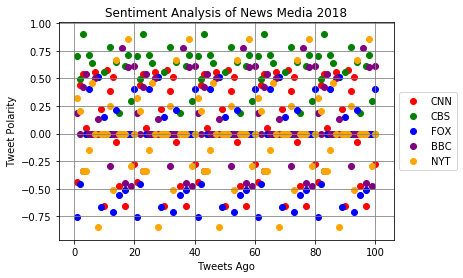

In [93]:
#CNN
plt.scatter(cnn['Tweet Ago'], cnn['Compound'], facecolors = "red", label = "CNN")
#CBS
plt.scatter(cbs['Tweet Ago'], cbs['Compound'],facecolors = "green", label = "CBS")
#Fox News
plt.scatter(fox['Tweet Ago'], fox['Compound'],facecolors = "blue", label = "FOX")
#BBC
plt.scatter(bbc['Tweet Ago'], bbc['Compound'],facecolors = "purple", label = "BBC")
#NYT
plt.scatter(nyt['Tweet Ago'], nyt['Compound'],facecolors = "orange", label = "NYT")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of News Media 2018")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(b=True, which = 'major', color ='gray', linestyle='-')
plt.savefig("Sentiment Analysis")
plt.show()

In [94]:
#Bar Graph Calculations

#CNN
tcnn = cnn['Compound'].sum()
#CBS
tcbs = cbs['Compound'].sum()
#Fox
tfox = fox['Compound'].sum()
#BBC
tbbc = bbc['Compound'].sum()
#NYT
tnyt = nyt['Compound'].sum()
com_val = [tcnn,tcbs,tbbc,tfox,tnyt]
x_axis = np.arange(len(com_val))

#CNN
#plt.bar(x_axis, tcnn,color = "red", align ="edge",)
#CBS
#plt.bar(x_axis, tcbs,color = "green", align ="edge")
#Fox News
#plt.bar(x_axis, tfox,color = "blue",  align ="edge")
#BBC
#plt.bar(x_axis, tbbc,color = "purple",  align ="edge")
#NYT
#plt.bar(x_axis, tnyt, color = "orange",  align ="edge")
barlist=plt.bar(x_axis, com_val, align = "edge")
#Setting colors
barlist[0].set_color("purple")
barlist[1].set_color("green")
barlist[2].set_color("red")
barlist[3].set_color("blue")
barlist[4].set_color("orange")

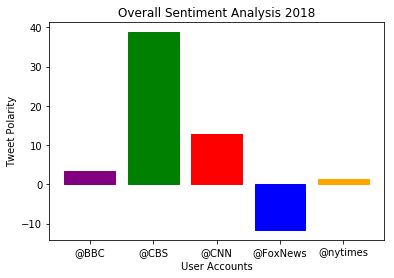

In [95]:
tick_locations = [value +.4 for value in x_axis]
plt.xticks(tick_locations, target_user)

plt.title("Overall Sentiment Analysis 2018")
plt.xlabel("User Accounts")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment Analysis")
plt.show(barlist)